In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# checking directory

import os
print(os.getcwd())

C:\Users\pulkitmalhotra


In [21]:
# Loading the dataset first

data=pd.read_csv("cars-dataset.csv")
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [22]:
data.shape

(398, 8)

In [23]:
data.info()

# 2 columna of type object
# none of the columns have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [25]:
data.isnull().any()

# this confirms no columns with null/empty values.

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [26]:
# Let's look at the unique elements of horsepower to look for discrepancies 

data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [27]:
# When we print out all the unique values in horsepower, we find that there is '?' 
# which was used as a placeholder for missing values. Lest remove these entries.

data = data[data.hp != '?']

In [28]:
print('?' in new_data.hp)

# this confirms there is no data with ? now.

False


In [29]:
data.shape

# this shows that 6 rows have been removed.

(392, 8)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.6+ KB


In [34]:
# However the horsepower data is still an object type and not float.
# So we will first change its datatype to float. 

data.hp = data.hp.astype('float64')
data.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [37]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


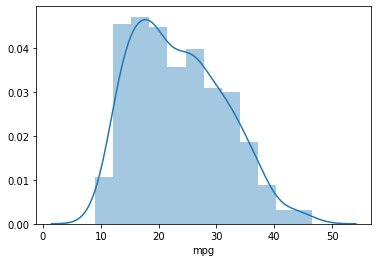

In [38]:
# For MPG the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

sns.distplot(data['mpg'])

In [39]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [40]:
# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is negative hence less data points are around the tail

In [41]:
# Lets visualise some relationships between these data points, but before we do, 
# we need to scale them to same the same range of [0,1]
# In order to do so, lets define a function scale

def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [42]:
data_scale = data.copy()

In [43]:
data_scale ['disp'] = scale(data_scale['disp'])
data_scale['hp'] = scale(data_scale['hp'])
data_scale ['acc'] = scale(data_scale['acc'])
data_scale ['wt'] = scale(data_scale['wt'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [44]:
data_scale.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,0.617571,0.456522,0.536150,0.238095,70,0.239362
1,buick skylark 320,8,0.728682,0.646739,0.589736,0.208333,70,0.159574
2,plymouth satellite,8,0.645995,0.565217,0.516870,0.178571,70,0.239362
3,amc rebel sst,8,0.609819,0.565217,0.516019,0.238095,70,0.186170
4,ford torino,8,0.604651,0.510870,0.520556,0.148810,70,0.212766


In [45]:
# All our data is now scaled to the same range of [0,1]. This will help us visualize data better. 
# We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

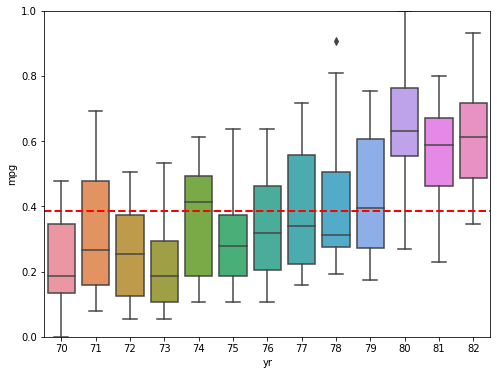

In [47]:
# Let's look at the year wise distribution of MPG

var = 'yr'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

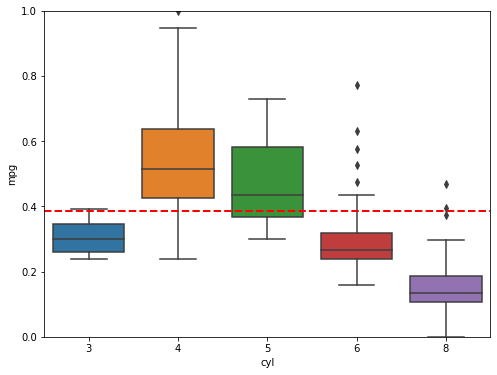

In [48]:
# And MPG distribution for cylinders

var = 'cyl'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

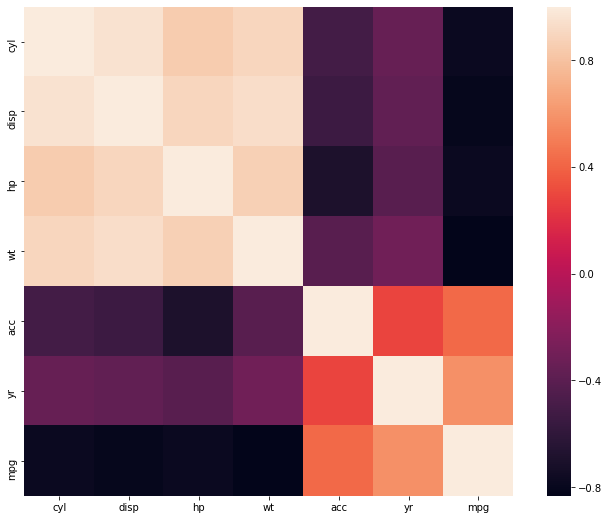

In [49]:
# Let's look at the heatmap

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

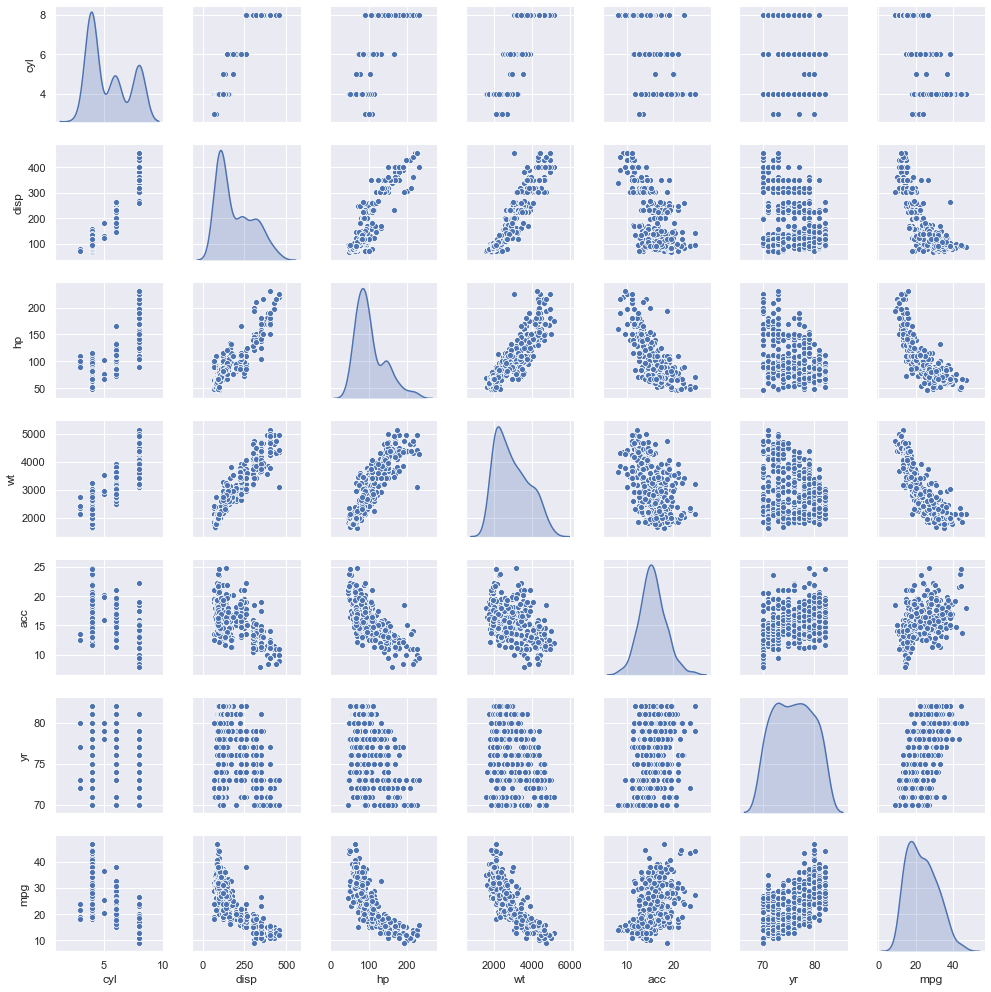

In [51]:
# Pair plot

sns.set()
sns.pairplot(data, size = 2.0, diag_kind="kde")
plt.show()

In [52]:
data.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


In [54]:
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


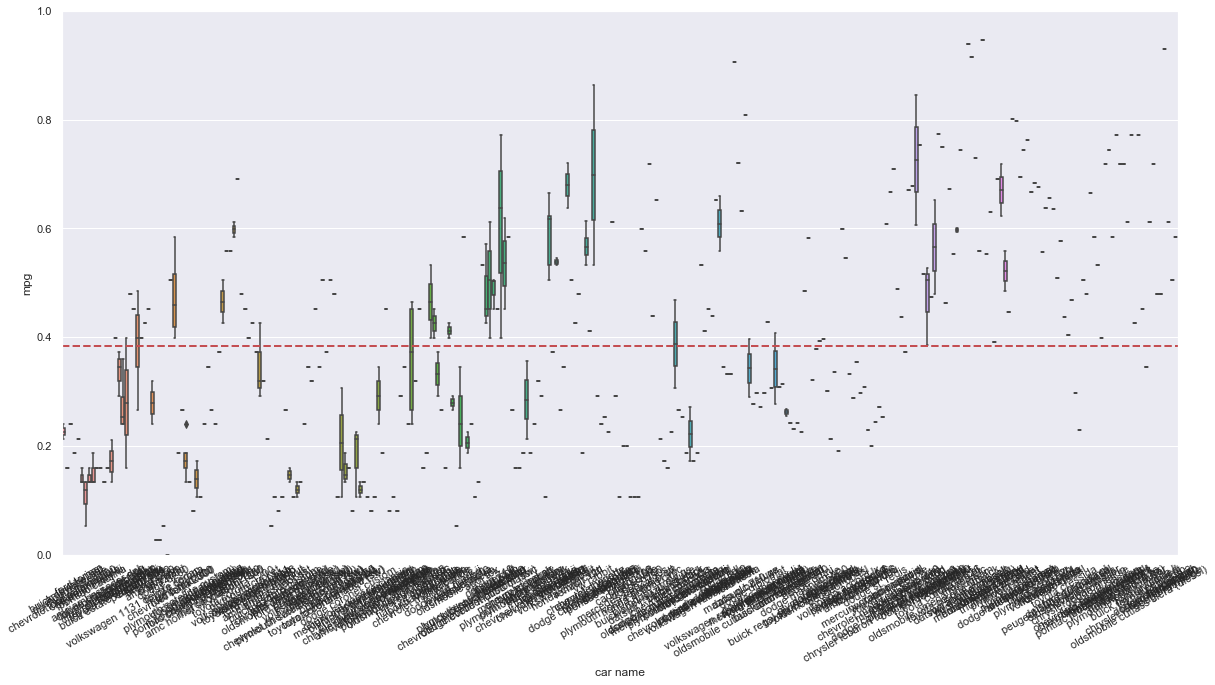

In [55]:
var = 'car name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [56]:
# Linear Regression

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [57]:
factors = ['cyl','disp','hp','wt','acc','yr']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [58]:
X = StandardScaler().fit_transform(X)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [60]:
regressor = LinearRegression()

In [61]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [62]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_predicted = regressor.predict(X_test)

In [64]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.6496867071157983

In [65]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [67]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [68]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.773344668702217

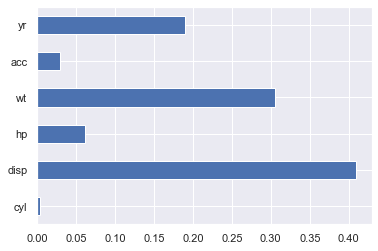

In [69]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [76]:
data_scale.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,0.617571,0.456522,0.536150,0.238095,70,0.239362
1,buick skylark 320,8,0.728682,0.646739,0.589736,0.208333,70,0.159574
2,plymouth satellite,8,0.645995,0.565217,0.516870,0.178571,70,0.239362
3,amc rebel sst,8,0.609819,0.565217,0.516019,0.238095,70,0.186170
4,ford torino,8,0.604651,0.510870,0.520556,0.148810,70,0.212766


In [79]:
data1 = data_scale.drop(['car name'], axis=1)
data1.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,0.617571,0.456522,0.536150,0.238095,70,0.239362
1,8,0.728682,0.646739,0.589736,0.208333,70,0.159574
2,8,0.645995,0.565217,0.516870,0.178571,70,0.239362
3,8,0.609819,0.565217,0.516019,0.238095,70,0.186170
4,8,0.604651,0.510870,0.520556,0.148810,70,0.212766


In [94]:
# KMeans Clustering

from sklearn.cluster import KMeans
from sklearn import metrics

cluster_range = range( 2, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data1)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(data1, labels, metric='euclidean'))


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,3310.899875,0.462590
1,3,1743.223704,0.513229
2,4,1226.510771,0.515619
3,5,876.885582,0.529407
4,6,762.359524,0.517221
5,7,645.682660,0.533879
6,8,584.830624,0.467755
7,9,492.605653,0.520331


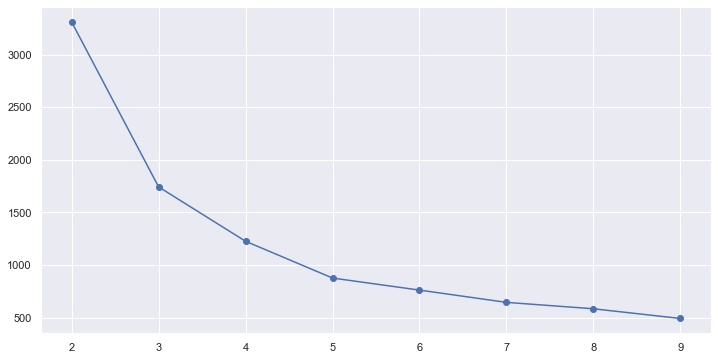

In [95]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [96]:
# The elbow plot shows that 3, 4 or 5 might be a good choice for K and it seems logical given we know there are 7 qualities of wine

In [97]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(data1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [98]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[4.39423077e+00, 1.61747168e-01, 1.90060619e-01, 2.50858760e-01,
        5.06238553e-01, 8.06634615e+01, 5.94133592e-01, 4.00000000e+00],
       [7.00000000e+00, 5.29384483e-01, 4.11649944e-01, 5.80906996e-01,
        4.43070818e-01, 7.67820513e+01, 2.35235952e-01, 8.88178420e-16],
       [4.34666667e+00, 1.49440138e-01, 2.11811594e-01, 2.24039316e-01,
        5.09920635e-01, 7.24800000e+01, 3.97872340e-01, 2.00000000e+00],
       [4.00000000e+00, 1.07708872e-01, 1.86956522e-01, 2.03931575e-01,
        4.90178571e-01, 7.66500000e+01, 4.94946809e-01, 1.00000000e+00],
       [7.68000000e+00, 6.96813092e-01, 6.07826087e-01, 6.82994046e-01,
        2.81349206e-01, 7.16133333e+01, 1.45744681e-01, 3.00000000e+00]])

In [99]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(data1) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,4.394231,0.161747,0.190061,0.250859,0.506239,80.663462,0.594134,4.000000e+00
1,7.000000,0.529384,0.411650,0.580907,0.443071,76.782051,0.235236,8.881784e-16
2,4.346667,0.149440,0.211812,0.224039,0.509921,72.480000,0.397872,2.000000e+00
3,4.000000,0.107709,0.186957,0.203932,0.490179,76.650000,0.494947,1.000000e+00
4,7.680000,0.696813,0.607826,0.682994,0.281349,71.613333,0.145745,3.000000e+00


In [100]:
prediction=cluster.predict(data1)
data1["GROUP"] = prediction

In [101]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

data1.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,104,104,104,104,104,104,104
1,78,78,78,78,78,78,78
2,75,75,75,75,75,75,75
3,60,60,60,60,60,60,60
4,75,75,75,75,75,75,75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006ED685DAC8>,
      dtype=object)

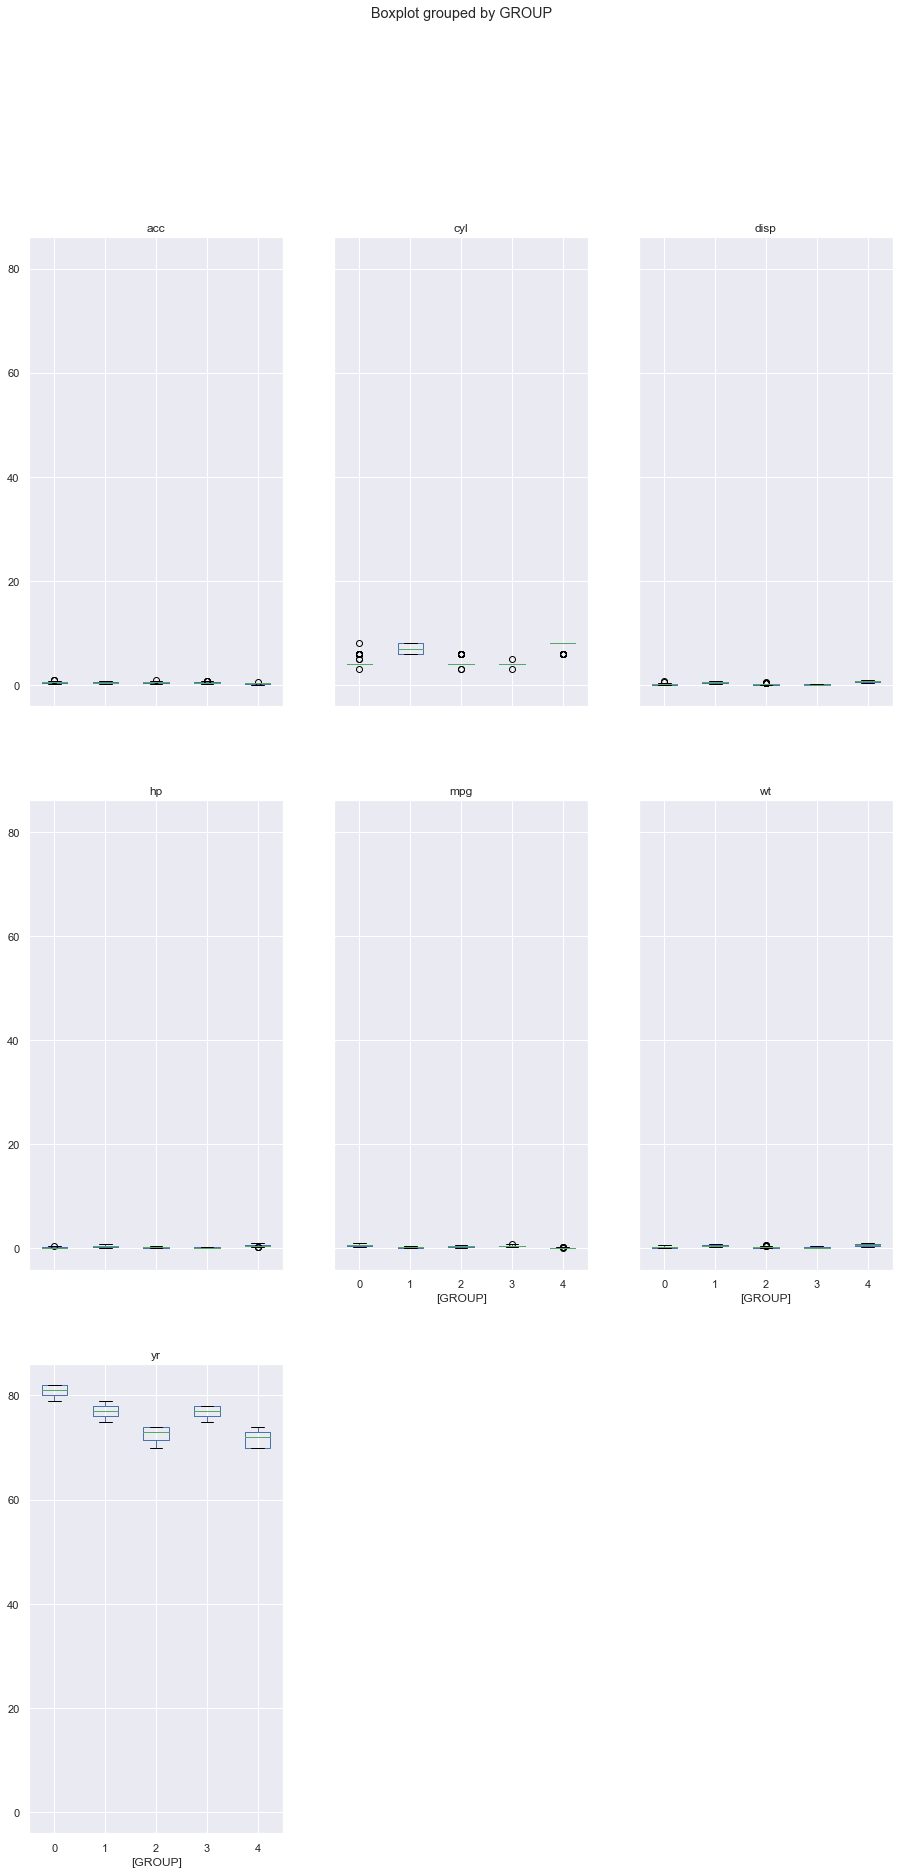

In [102]:
import matplotlib.pylab as plt

data1.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))


In [103]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


In [104]:
# Identifying and handling outliers

# Addressing outliers at group level

data = data1   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(data1['GROUP']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006ED7CB8048>,
      dtype=object)

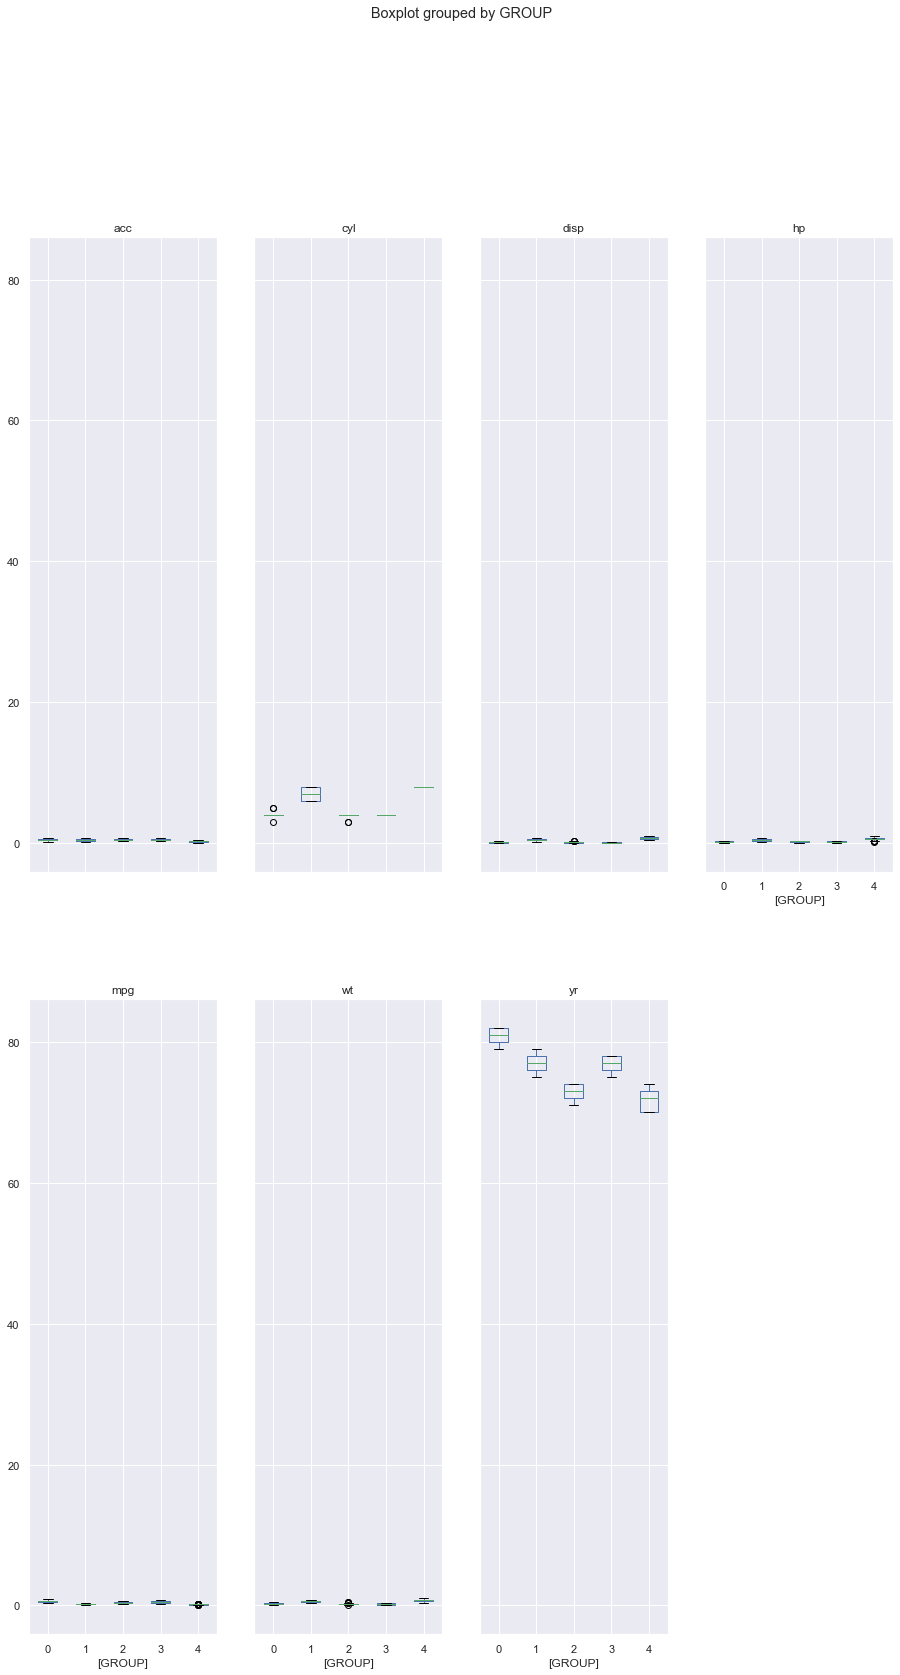

In [105]:
concat_data.boxplot(by = 'GROUP', layout=(3,4), figsize=(15, 40))